In [10]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [11]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexPie/'

In [12]:
final_df=pd.read_csv('ComplexPie_MS_PerStep.csv')

In [13]:
filtered_addcinnamon = final_df[final_df['Step'].str.strip() == 'Add cinnamon']
filtered_addcinnamon

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
4,C001,36,Add cinnamon,332.507892,473.722655,552.750738,459.671170,679.054074,936.655177,0.000000,0.000000
15,C003,58,Add cinnamon,63.216986,94.901605,87.897351,50.392992,102.029885,386.250360,232.732397,151.361513
26,C006,42,Add cinnamon,0.000000,467.617148,0.000000,0.000000,845.146150,791.188534,0.000000,0.000000
37,C008,34,Add cinnamon,237.613261,348.966293,357.126817,368.571224,301.645953,850.896419,749.151677,546.631920
48,C009,24,Add cinnamon,113.008018,181.765418,155.237545,152.036453,144.311283,381.119681,328.953711,222.022422
59,C012,54,Add cinnamon,206.194707,239.530605,267.236872,221.274184,218.697388,806.863162,560.781051,358.166667
70,C013,48,Add cinnamon,471.875852,538.685216,547.941439,515.647652,672.623875,851.695093,742.580899,627.220704
81,C016,39,Add cinnamon,154.036838,322.836796,272.788526,238.180157,316.876245,722.745521,520.328291,359.905787
92,C017,36,Add cinnamon,60.180033,188.159975,306.440016,155.317077,219.915122,468.420989,382.154188,245.550354
103,C020,30,Add cinnamon,712.336456,1063.913755,1363.010567,1054.180742,2124.107917,3096.883017,2017.308953,1222.728386


In [14]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_addcinnamon = filtered_addcinnamon.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_addcinnamon.select_dtypes(include=['float64', 'int64']).columns
filtered_addcinnamon[numerical_cols] = filtered_addcinnamon[numerical_cols].replace(0, np.nan)

filtered_addcinnamon[numerical_cols] = imputer.fit_transform(filtered_addcinnamon[numerical_cols])
filtered_addcinnamon

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
4,C001,36.0,Add cinnamon,332.507892,473.722655,552.750738,459.671170,679.054074,936.655177,742.580899,627.220704
15,C003,58.0,Add cinnamon,63.216986,94.901605,87.897351,50.392992,102.029885,386.250360,232.732397,151.361513
26,C006,42.0,Add cinnamon,471.875852,467.617148,547.941439,515.647652,845.146150,791.188534,742.580899,627.220704
37,C008,34.0,Add cinnamon,237.613261,348.966293,357.126817,368.571224,301.645953,850.896419,749.151677,546.631920
48,C009,24.0,Add cinnamon,113.008018,181.765418,155.237545,152.036453,144.311283,381.119681,328.953711,222.022422
59,C012,54.0,Add cinnamon,206.194707,239.530605,267.236872,221.274184,218.697388,806.863162,560.781051,358.166667
70,C013,48.0,Add cinnamon,471.875852,538.685216,547.941439,515.647652,672.623875,851.695093,742.580899,627.220704
81,C016,39.0,Add cinnamon,154.036838,322.836796,272.788526,238.180157,316.876245,722.745521,520.328291,359.905787
92,C017,36.0,Add cinnamon,60.180033,188.159975,306.440016,155.317077,219.915122,468.420989,382.154188,245.550354
103,C020,30.0,Add cinnamon,712.336456,1063.913755,1363.010567,1054.180742,2124.107917,3096.883017,2017.308953,1222.728386


In [15]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Cinnamon',
    'HeadCamera Distance': 'HeadCamera Distance - Add Cinnamon',
    'LeftElbow Distance': 'LeftElbow Distance - Add Cinnamon',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Cinnamon',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Cinnamon',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Cinnamon',
    'RightElbow Distance': 'RightElbow Distance - Add Cinnamon',
    'RightShoulder Distance': 'RightShoulder Distance - Add Cinnamon'
}

# Rename columns
filtered_addcinnamon = filtered_addcinnamon.rename(columns=new_column_names)
filtered_addcinnamon

,Participant,Block Design Raw Score,Step,Chest Distance - Add Cinnamon,HeadCamera Distance - Add Cinnamon,LeftElbow Distance - Add Cinnamon,LeftShoulder Distance - Add Cinnamon,MotionControllerLeft Distance - Add Cinnamon,MotionControllerRight Distance - Add Cinnamon,RightElbow Distance - Add Cinnamon,RightShoulder Distance - Add Cinnamon
4,C001,36.0,Add cinnamon,332.507892,473.722655,552.750738,459.671170,679.054074,936.655177,742.580899,627.220704
15,C003,58.0,Add cinnamon,63.216986,94.901605,87.897351,50.392992,102.029885,386.250360,232.732397,151.361513
26,C006,42.0,Add cinnamon,471.875852,467.617148,547.941439,515.647652,845.146150,791.188534,742.580899,627.220704
37,C008,34.0,Add cinnamon,237.613261,348.966293,357.126817,368.571224,301.645953,850.896419,749.151677,546.631920
48,C009,24.0,Add cinnamon,113.008018,181.765418,155.237545,152.036453,144.311283,381.119681,328.953711,222.022422
59,C012,54.0,Add cinnamon,206.194707,239.530605,267.236872,221.274184,218.697388,806.863162,560.781051,358.166667
70,C013,48.0,Add cinnamon,471.875852,538.685216,547.941439,515.647652,672.623875,851.695093,742.580899,627.220704
81,C016,39.0,Add cinnamon,154.036838,322.836796,272.788526,238.180157,316.876245,722.745521,520.328291,359.905787
92,C017,36.0,Add cinnamon,60.180033,188.159975,306.440016,155.317077,219.915122,468.420989,382.154188,245.550354
103,C020,30.0,Add cinnamon,712.336456,1063.913755,1363.010567,1054.180742,2124.107917,3096.883017,2017.308953,1222.728386


In [16]:
tracker_columns = ['Chest Distance - Add Cinnamon', 'HeadCamera Distance - Add Cinnamon', 'LeftElbow Distance - Add Cinnamon', 'LeftShoulder Distance - Add Cinnamon',
                   'RightElbow Distance - Add Cinnamon', 'RightShoulder Distance - Add Cinnamon', 'MotionControllerLeft Distance - Add Cinnamon',
                   'MotionControllerRight Distance - Add Cinnamon']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_addcinnamon, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_addcinnamon[block_design_col], filtered_addcinnamon[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_addcinnamon, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Cinnamon,-0.112260,0.678927
1,HeadCamera Distance - Add Cinnamon,-0.116520,0.667384
2,LeftElbow Distance - Add Cinnamon,-0.487824,0.055251
3,LeftShoulder Distance - Add Cinnamon,-0.241329,0.367894
4,RightElbow Distance - Add Cinnamon,-0.146450,0.588361
5,RightShoulder Distance - Add Cinnamon,-0.139053,0.607531
6,MotionControllerLeft Distance - Add Cinnamon,-0.356934,0.174739
7,MotionControllerRight Distance - Add Cinnamon,-0.120944,0.655468


In [17]:
#filtered_addcinnamon.to_csv('ComplexPie_AddCinnamon.csv',index=False)

In [18]:
'''
tracker_columns = ['Chest Distance - Add Cinnamon', 'HeadCamera Distance - Add Cinnamon', 'LeftElbow Distance - Add Cinnamon', 'LeftShoulder Distance - Add Cinnamon',
                   'RightElbow Distance - Add Cinnamon', 'RightShoulder Distance - Add Cinnamon', 'MotionControllerLeft Distance - Add Cinnamon',
                   'MotionControllerRight Distance - Add Cinnamon']
block_design_col = 'Block Design Raw Score'
# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_addcinnamon, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        filtered_df = filtered_addcinnamon[filtered_addcinnamon[tracker_col] != 0]
        
        # Calculate Spearman correlation and p-value
        correlation, p_value = spearmanr(filtered_df[block_design_col], filtered_df[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_addcinnamon, tracker_columns, block_design_col)
correlation_df'''

"\ntracker_columns = ['Chest Distance - Add Cinnamon', 'HeadCamera Distance - Add Cinnamon', 'LeftElbow Distance - Add Cinnamon', 'LeftShoulder Distance - Add Cinnamon',\n                   'RightElbow Distance - Add Cinnamon', 'RightShoulder Distance - Add Cinnamon', 'MotionControllerLeft Distance - Add Cinnamon',\n                   'MotionControllerRight Distance - Add Cinnamon']\nblock_design_col = 'Block Design Raw Score'\n# Function to calculate and display correlation for each tracker\ndef calculate_correlations(filtered_addcinnamon, tracker_columns, block_design_col):\n    correlations = []\n    for tracker_col in tracker_columns:\n        filtered_df = filtered_addcinnamon[filtered_addcinnamon[tracker_col] != 0]\n        \n        # Calculate Spearman correlation and p-value\n        correlation, p_value = spearmanr(filtered_df[block_design_col], filtered_df[tracker_col])\n        correlations.append({\n            'Tracker': tracker_col,\n            'Correlation': correlatio

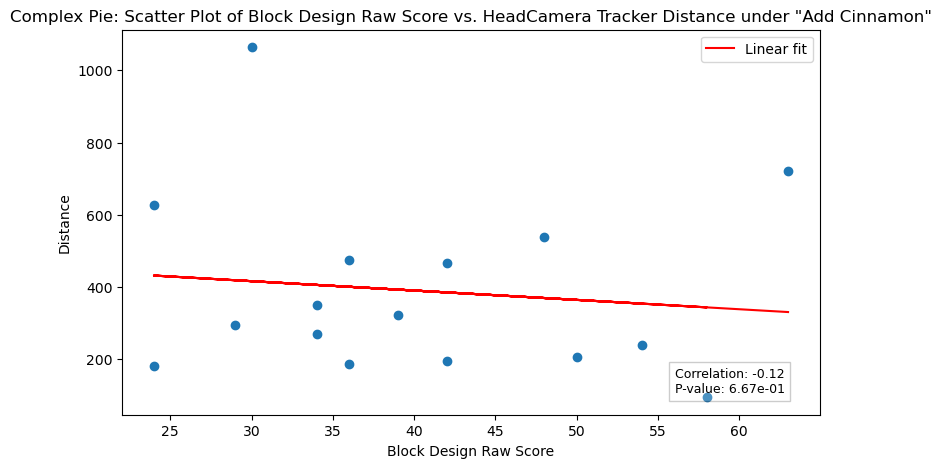

In [19]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['HeadCamera Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['HeadCamera Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['HeadCamera Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '33 CP_CinnamonDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

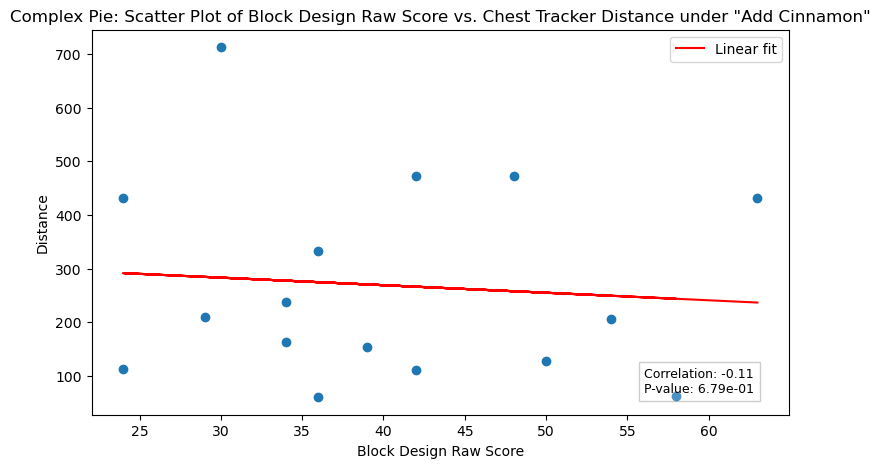

In [20]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['Chest Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['Chest Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['Chest Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '34 CP_CinnamonDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

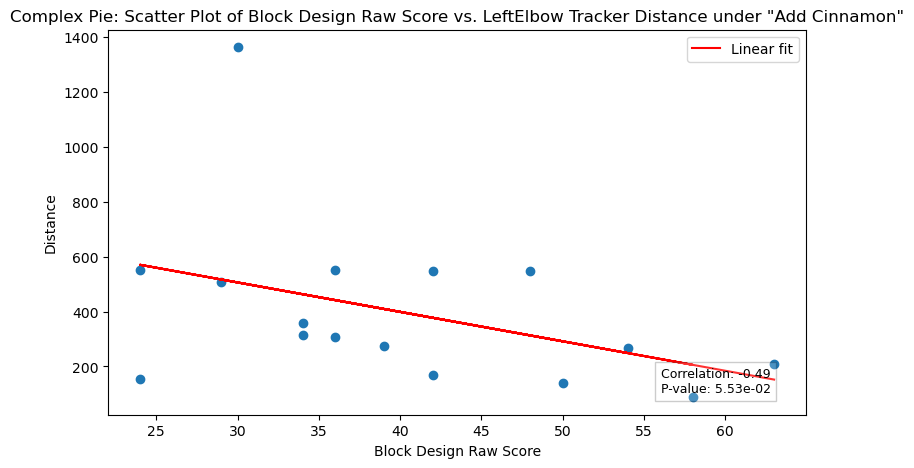

In [21]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftElbow Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftElbow Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftElbow Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '35 CP_CinnamonDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

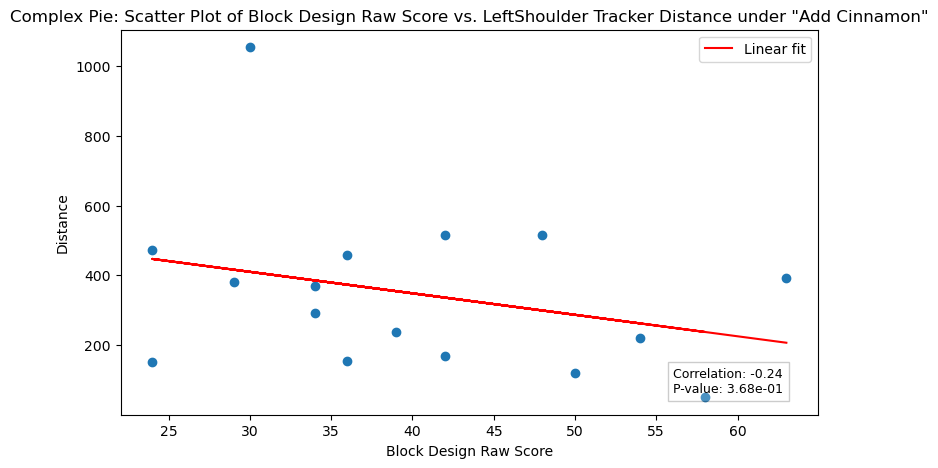

In [22]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftShoulder Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftShoulder Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftShoulder Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '36 CP_CinnamonDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

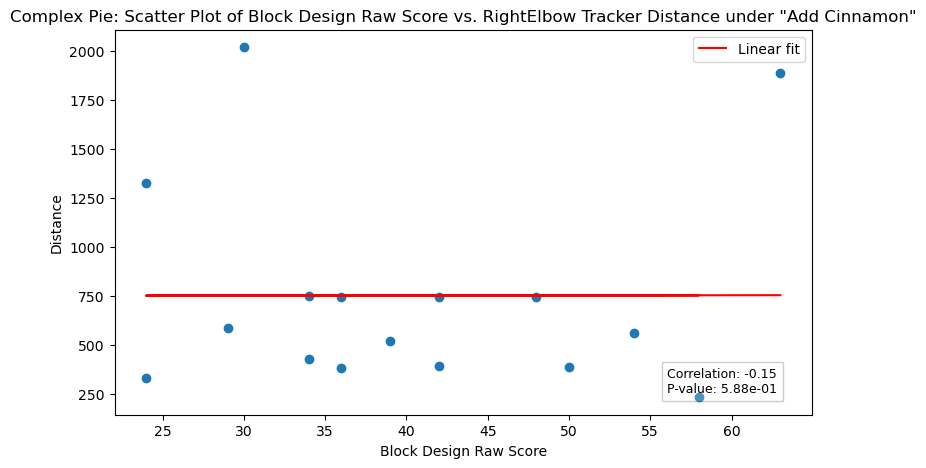

In [23]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightElbow Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightElbow Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightElbow Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '37 CP_CinnamonDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

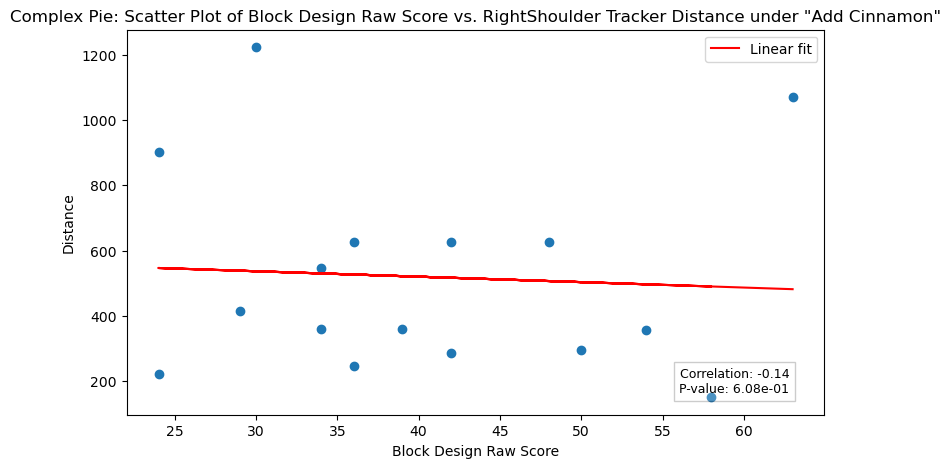

In [24]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightShoulder Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightShoulder Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightShoulder Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '38 CP_CinnamonDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

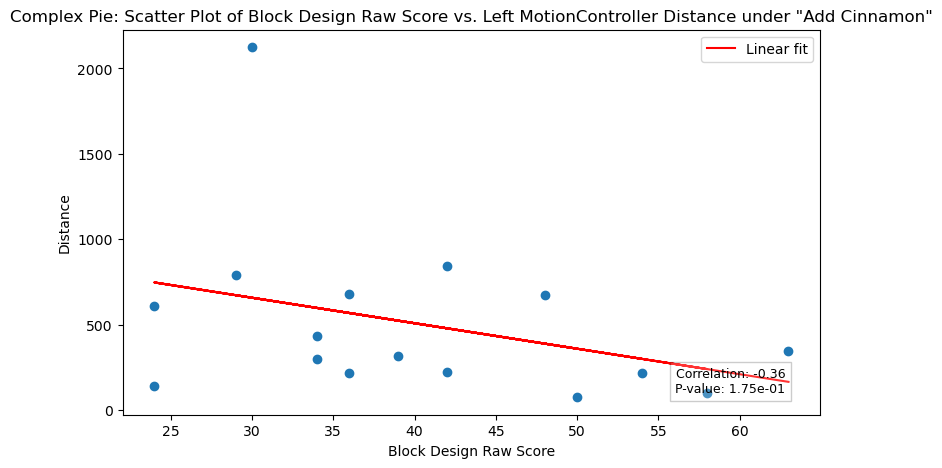

In [25]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerLeft Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerLeft Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerLeft Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '39 CP_CinnamonDistanceLeftContlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

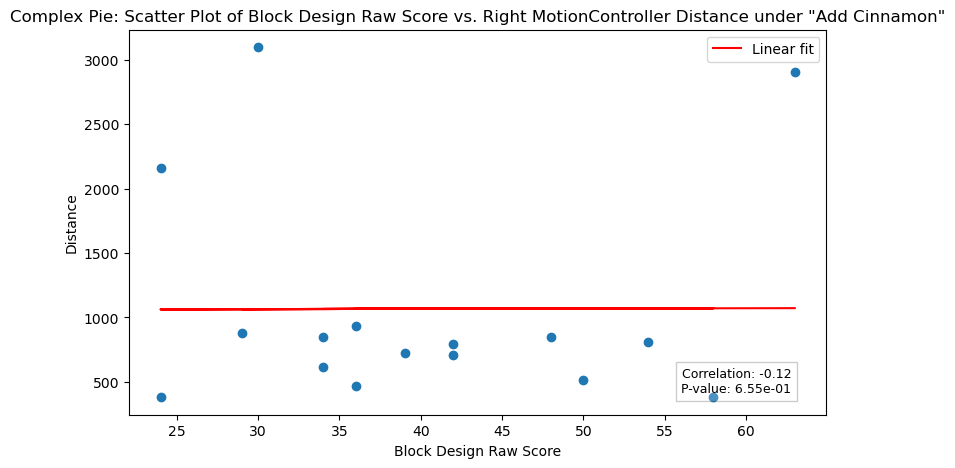

In [26]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerRight Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerRight Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerRight Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '40 CP_CinnamonDistanceRightContlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()